**Chapter 05**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels as sns

# 5

In [16]:
defualt_file_path = '../data/Default.csv'
defaults = pd.read_csv(defualt_file_path,index_col=0)
defaults.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


## 5(b)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X = defaults[['balance','income']].values
y = defaults['default'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4, random_state=0)
lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
pred = lg.predict(X_test)
print('inaccuracy ratio is %f' %(1-accuracy_score(y_test,pred)))

inaccuracy ratio is 0.037500


## 5(c)

In [19]:
randoms = [1,2,3]
for random in randoms:
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4, random_state=random)
    lg = LogisticRegression()
    lg.fit(X_train, y_train)
    pred = lg.predict(X_test)
    print('inaccuracy ratio is %f' %(1-accuracy_score(y_test,pred)))

inaccuracy ratio is 0.030750
inaccuracy ratio is 0.030750
inaccuracy ratio is 0.034000


## 5(d)

In [20]:
students = defaults['student'].values
defaults['student01']=[1 if student=='Yes' else -1 for student in students]

In [21]:
X = defaults[['income','balance','student01']]
y = defaults['default']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4, random_state=0)
lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
pred = lg.predict(X_test)
print('inaccuracy ratio is %f' %(1-accuracy_score(y_test,pred)))

inaccuracy ratio is 0.037500


# 6
## 6(a)

In [32]:
np.random.seed(1)
iter_num = 10
X = defaults[['balance','income']].values
y = defaults['default'].values
rows = range(len(y))
samples = int(len(y) * 0.8)
coefficients = []
for _ in range(iter_num):
    indices = np.random.choice(rows, samples, replace=True)
    X_train = X[indices,:]
    y_train = y[indices]
    lg = LogisticRegression()
    lg.fit(X_train, y_train)
    coefficients.append(lg.coef_)
coefficients=np.array(coefficients).reshape((10,2))
coef = pd.DataFrame(coefficients,columns=['blance','income'])
coef.describe()

,blance,income
count,10.000000,10.000000
mean,0.000400,-0.000126
std,0.000097,0.000005
min,0.000234,-0.000135
25%,0.000349,-0.000128
50%,0.000436,-0.000125
75%,0.000468,-0.000123
max,0.000505,-0.000118


## 6(c)

In [43]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(base_estimator=LogisticRegression(),n_estimators=10, max_samples=0.8, max_features=1.0,
                           )
bagging.fit(X,y)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.8, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [56]:
coefs = [estimator.coef_ for estimator in bagging.estimators_]
coefs = np.array(coefs).reshape((10,2))
coefs = pd.DataFrame(coef, columns=['blance','income'])
coefs.describe()

,blance,income
count,10.000000,10.000000
mean,0.000400,-0.000126
std,0.000097,0.000005
min,0.000234,-0.000135
25%,0.000349,-0.000128
50%,0.000436,-0.000125
75%,0.000468,-0.000123
max,0.000505,-0.000118


# 7

In [58]:
weekly_file_path='../data/Weekly.csv'
weeklys = pd.read_csv(weekly_file_path, index_col=0)
weeklys.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
2,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
3,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
4,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
5,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


## 7(a)

In [59]:
X = weeklys[['Lag1','Lag2']].values
y = weeklys['Direction'].values
lg = LogisticRegression()
lg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## 7(b)

In [61]:
X1 = X[1:,:]
y1 = y[1:]
lg = LogisticRegression()
lg.fit(X1, y1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## 7(c)

In [62]:
pred = lg.predict(X[1,:])
print(pred)

['Up']


/Users/gaufung/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


## 7(d,e)

In [76]:
errors =0
for i in range(X.shape[0]):
    X_i = np.vstack((X[0:i,:],X[i+1:,:]))
    y_i = np.concatenate((y[0:i],y[i+1:]))
    lg = LogisticRegression()
    lg.fit(X_i,y_i)
    pred = lg.predict(X[i,:])
    error = 1 if pred != y[i] else 0
    errors += error

/Users/gaufung/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/gaufung/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/gaufung/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a singl

In [77]:
errors

490

# 8

## 8(a)

In [79]:
np.random.seed(1)
y = np.random.normal(0,1,100)
x = np.random.normal(0,1,100)
y = x - 2*x**2 + np.random.normal(0,1,100)

$$
y = x - 2\times x^2
$$

## 8(b)

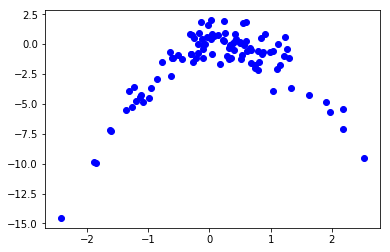

In [85]:
plt.scatter(x, y, c='b',marker='o')
plt.show()

In [86]:
data = pd.DataFrame({'y':y,
                     'x':x})
data['x2'] = x**2
data['x3'] = x**3
data['x4'] = x**4

## 11(c)

In [107]:
from statsmodels.formula.api import ols
def LOOCV_OLS(formula):
    loss = 0.0
    for i in range(len(data)):
        model = ols(formula=formula, data=data.drop(i)).fit()
        result = model.predict(data.iloc[i])
        loss += (result - data.iloc[i]['y'])**2
    return loss / len(data)

In [110]:
print('i:', LOOCV_OLS('y ~ x'))
print('ii:', LOOCV_OLS('y ~ x + x2'))
print('iii:', LOOCV_OLS('y ~ x + x2 + x3'))
print('iv:', LOOCV_OLS('y ~ x + x2 + x3 + x4'))

i: [ 8.29221162]
ii: [ 1.01709581]
iii: [ 1.04655346]
iv: [ 1.05749267]


## 11(d)
When model is $Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon$, it has lowest residual.

# 12 

In [111]:
boston_file_path = '../data/Boston.csv'
bostons = pd.read_csv(boston_file_path, index_col=0)
bostons.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## 12(a)

In [112]:
medv = bostons['medv'].values
mean_medv = np.mean(medv)
print(mean_medv)

22.5328063241


## 12(b)

In [113]:
standard_error = np.sqrt(np.sum((mean_medv - medv)**2)) / len(medv)
print(standard_error)

0.408456934697


## 12(c)

In [120]:
num_iter = 1000
ratio = 0.8
num_sample = int(len(medv) * ratio)
mean_medvs = []
for _ in range(num_iter):
    indices = np.random.choice(range(len(medv)), num_sample, replace=True)
    samples = medv[indices]
    mean_medvs.append(np.mean(samples))

In [121]:
hat_mean_medv = np.mean(mean_medvs)
hat_mean_medv

22.545076980198022

In [122]:
standard_error = np.sqrt(np.sum((hat_mean_medv - mean_medvs)**2)/(len(mean_medvs)-1))
print(standard_error)

0.470084915104


approximately equal to the above answer, $0.470$ versus $0.408$.

## 12(d)

The mean value of medv is $[22.545 - 2\times 0.470, 22.54 + \times 0.470] \approx [21.605,23.485]$

In [132]:
from scipy import stats
ttest = stats.ttest_1samp(medv,0)

In [133]:
ttest

Ttest_1sampResult(statistic=55.111145830373921, pvalue=9.3706237271326624e-216)

## 12(e)

In [134]:
med_medv = np.median(medv)
print(med_medv)

21.2


## 12(f)

In [137]:
num_iter = 1000
ratio = 0.8
num_sample = int(len(medv) * ratio)
med_medvs = []
for _ in range(num_iter):
    indices = np.random.choice(range(len(medv)), num_sample, replace=True)
    samples = medv[indices]
    med_medvs.append(np.median(samples))
hat_med_medv = np.mean(med_medvs)
print(hat_med_medv)

21.1741


In [138]:
standard_error = np.sqrt(np.sum((hat_med_medv - med_medvs)**2)/(len(med_medvs)-1))
print(standard_error)

0.414072029538
